In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [79]:
df = pd.read_csv('cookie_cats.csv')
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [80]:
plt.figure(figsize=(15, 8))
#sns.kdeplot(data=df, x='sum_gamerounds', hue="version")


<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

In [81]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [82]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [84]:
df.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90189.0,51.872457,195.050858,0.0,0.0,1.0,1.0,3.0,16.0,67.0,134.0,221.0,493.0,49854.0


In [85]:
#Основные статитсики. у gate_30 наблюдается сильный выброс. Но они не попадат в интервал 99%
df.groupby('version')['sum_gamerounds'].agg(['mean', 'std', 'var', 'min', 'max'])

,mean,std,var,min,max
version,,,,,
gate_30,52.456264,256.716423,65903.321897,0,49854
gate_40,51.298776,103.294416,10669.736422,0,2640


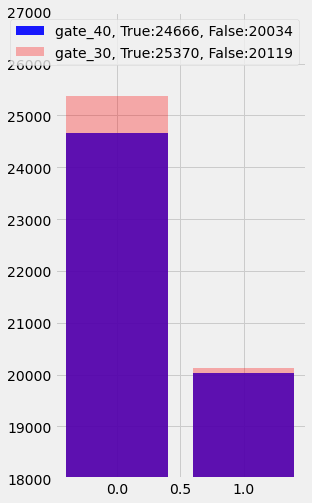

In [86]:
df_gate_30 = df[df['version'] == 'gate_30']
df_gate_40 = df[df['version'] == 'gate_40']

fig, ax = plt.subplots()
ax0 = ax
fig.set_size_inches(4, 8)

bar_gate40_r1 = df_gate_30.groupby('retention_1')['retention_1'].count()
ax0.bar(bar_gate40_r1.index, bar_gate40_r1, color='blue', alpha=0.9, 
        label='gate_40, True:{}, False:{}'.format(bar_gate40_r1[0], bar_gate40_r1[1]))

bar_gate30_r1 = df_gate_40.groupby('retention_1')['retention_1'].count()
ax0.bar(bar_gate30_r1.index, bar_gate30_r1, color='red', alpha=0.3, 
        label='gate_30, True:{}, False:{}'.format(bar_gate30_r1[0], bar_gate30_r1[1]))

ax0.set_ylim([18000, 27000])
ax0.legend()

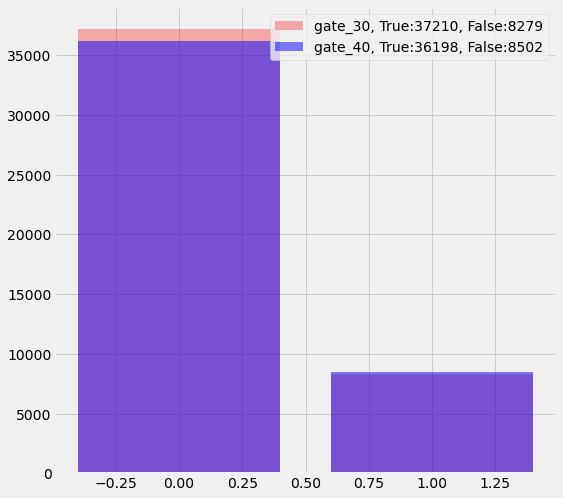

In [87]:
fig, ax = plt.subplots()
ax0 = ax
fig.set_size_inches(8, 8)

bar_gate30_r7 = df_gate_40.groupby('retention_7')['retention_7'].count()
ax0.bar(bar_gate30_r7.index, bar_gate30_r7, color='red', alpha=0.3, 
        label='gate_30, True:{}, False:{}'.format(bar_gate30_r7[0], bar_gate30_r7[1]))

bar_gate40_r7 = df_gate_30.groupby('retention_7')['retention_7'].count()
ax0.bar(bar_gate40_r7.index, bar_gate40_r7, color='blue', alpha=0.5, 
        label='gate_40, True:{}, False:{}'.format(bar_gate40_r7[0], bar_gate40_r7[1]))

ax0.legend()

## OUTLERS

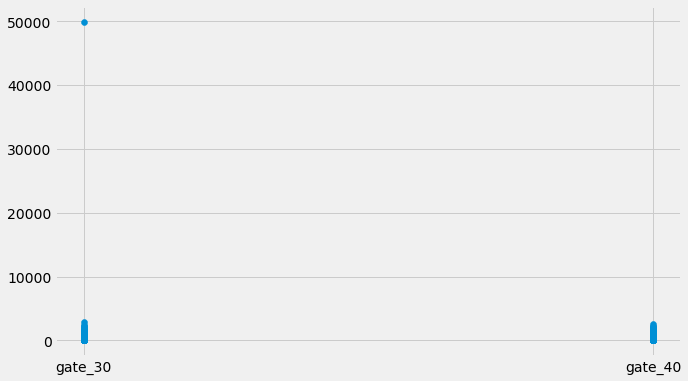

In [88]:
#One significant outlier to get rid of
plt.figure(figsize=(10, 6))
plt.scatter(df['version'], df['sum_gamerounds'])

In [89]:
df_outlers = df[df['sum_gamerounds'] < 10000]
df_outlers.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90188.0,51.320253,102.682719,0.0,0.0,1.0,1.0,3.0,16.0,67.0,134.0,221.0,493.0,2961.0


In [90]:
df_outlers.groupby('version')['sum_gamerounds'].agg(['mean', 'std', 'var', 'min', 'max'])

,mean,std,var,min,max
version,,,,,
gate_30,51.342111,102.057598,10415.753288,0,2961
gate_40,51.298776,103.294416,10669.736422,0,2640


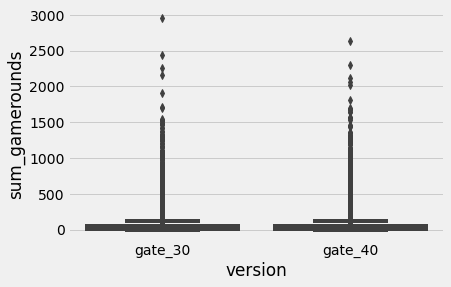

In [91]:
sns.boxplot(x='version', y='sum_gamerounds', data=df_outlers)

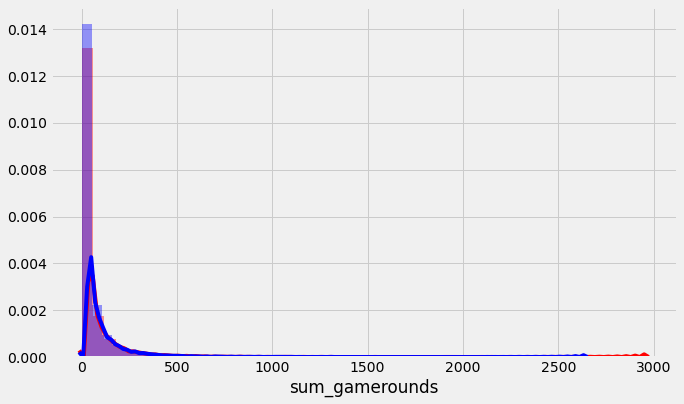

In [92]:
fig, ax = plt.subplots(1, 1)
ax1 = ax
fig.set_size_inches(10, 6)
sns.distplot(df_outlers[df_outlers['version'] == 'gate_30']['sum_gamerounds'], color = 'red', ax=ax1)
sns.distplot(df_outlers[df_outlers['version'] == 'gate_40']['sum_gamerounds'], color = 'blue', ax=ax1)

In [93]:
gamerounds_30 = df_outlers[df_outlers['version'] == 'gate_30']['sum_gamerounds']
gamerounds_40 = df_outlers[df_outlers['version'] == 'gate_40']['sum_gamerounds']
stats.ttest_ind(gamerounds_30, gamerounds_40)

Ttest_indResult(statistic=0.0633675766982082, pvalue=0.9494739458256001)

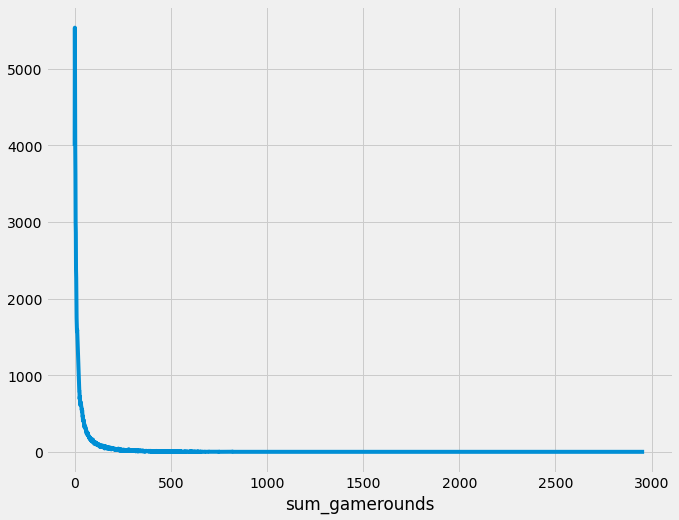

In [94]:
df_outlers.groupby('sum_gamerounds')['userid'].count().sort_index().plot(figsize=(10,8))

In [95]:
#How many users came to the 30th and 40th levels
df_outlers.groupby('sum_gamerounds')['userid'].count().iloc[[30, 40]]

sum_gamerounds
30    642
40    505
Name: userid, dtype: int64

In [96]:
df_outlers.groupby(['version', 'retention_1'])['sum_gamerounds'].agg(['mean', 'std', 'var', 'min', 'max', 'count'])

mean         std           var  min   max  count
version retention_1                                                       
gate_30 False        16.359092   36.528426   1334.325921    0  1072  24665
        True         94.411700  135.037697  18235.179569    0  2961  20034
gate_40 False        16.340402   35.925756   1290.659951    0  1241  25370
        True         95.381182  137.887256  19012.895403    0  2640  20119

In [97]:
df_outlers.groupby(['version', 'retention_7'])['sum_gamerounds'].agg(['mean', 'std', 'var', 'min', 'max', 'count'])

mean         std           var  min   max  count
version retention_7                                                        
gate_30 False         25.796508   43.316158   1876.289557    0   981  36198
        True         160.117516  179.358560  32169.492894    0  2961   8501
gate_40 False         25.856356   44.406112   1971.902798    0  2640  37210
        True         165.649837  183.792499  33779.682517    0  2294   8279

In [98]:
#People who came on the first day are more likely to return at 7
df_outlers['combine'] = list(map(lambda x,y: str(x)+'-'+str(y), df_outlers['retention_1'], df_outlers['retention_7']))
df_outlers.groupby(['version', 'combine'])['sum_gamerounds'].agg(['mean', 'std', 'var', 'min', 'max', 'count'])

mean         std           var  min   max  count
version combine                                                            
gate_30 False-False   11.819746   21.642643    468.403997    0   981  22840
        False-True    73.169315   93.222330   8690.402786    0  1072   1825
        True-False    49.694490   58.125396   3378.561669    0   918  13358
        True-True    183.886309  189.626390  35958.167896    0  2961   6676
gate_40 False-False   11.913294   20.901020    436.852628    0   547  23597
        False-True    75.261139   94.478048   8926.101632    0  1241   1773
        True-False    50.025490   60.924587   3711.805330    0  2640  13613
        True-True    190.282355  194.220077  37721.438327    0  2294   6506

In [99]:
df_outlers

,userid,version,sum_gamerounds,retention_1,retention_7,combine
0,116,gate_30,3,False,False,False-False
1,337,gate_30,38,True,False,True-False
2,377,gate_40,165,True,False,True-False
3,483,gate_40,1,False,False,False-False
4,488,gate_40,179,True,True,True-True
...,...,...,...,...,...,...
90184,9999441,gate_40,97,True,False,True-False
90185,9999479,gate_40,30,False,False,False-False
90186,9999710,gate_30,28,True,False,True-False
90187,9999768,gate_40,51,True,False,True-False


## A/B testing

The use of the "t-test" is permissible under the following conditions:

* correspondence of the frequency distribution in each of the compared groups to the law of normal distribution;
* no statistically significant difference between the variances of the compared groups (variance homogeneity).
* the presence of a sufficiently large number of observations in various groups (at least 20).

In [100]:
df_outlers['version'] = df_outlers['version'].map({'gate_30': 'A', 'gate_40': 'B'})
df_outlers.head()

,userid,version,sum_gamerounds,retention_1,retention_7,combine
0,116,A,3,False,False,False-False
1,337,A,38,True,False,True-False
2,377,B,165,True,False,True-False
3,483,B,1,False,False,False-False
4,488,B,179,True,True,True-True


In [101]:
A_group = df_outlers[df_outlers['version'] == 'A']['sum_gamerounds']
B_group = df_outlers[df_outlers['version'] == 'B']['sum_gamerounds']

shapiro_a = stats.shapiro(A_group)
shapiro_b = stats.shapiro(B_group)

Testlev = stats.levene(A_group, B_group)
Testlev

print('Shapiro A: {}\nShapiro B: {} \nAt a significance level of 0.05\n\nEquality of variances: {}'.\
      format(shapiro_a[1] > 0.05, shapiro_b[1] > 0.05, Testlev[1] > 0.05))

Shapiro A: False
Shapiro B: False 
At a significance level of 0.05

Equality of variances: True


In [102]:
#Therefore, I use the Mann-Whitney test
#If the resulting value {\displaystyle U}U is less than or equal to the table value, then the presence of 
#significant difference between the trait level in the samples under consideration
ttest = stats.mannwhitneyu(A_group, B_group)[1]
ttest < 0.05

True

In [103]:
#There are differences between the samples. And as a result of the analysis 
#group A shows the best activity results in the game
df_outlers.groupby('version')['retention_1'].mean()

version
A    0.448198
B    0.442283
Name: retention_1, dtype: float64

In [104]:
df_outlers.groupby('version')['retention_7'].mean()

version
A    0.190183
B    0.182000
Name: retention_7, dtype: float64